In [24]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [25]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = sum([len(files) for r, d, files in os.walk(test_dir)])

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

print("Number of training images: ", total_train)
print("Number of validation images: ", total_val)
print("Number of test images: ", total_test)

Streaming output truncated to the last 5000 lines.
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/

In [28]:
import os
import shutil

# Create 'all' subdirectory inside 'test'
os.makedirs(os.path.join(test_dir, 'all'), exist_ok=True)

# Move all images into the 'all' subdirectory
for file_name in os.listdir(test_dir):
    if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.move(os.path.join(test_dir, file_name), os.path.join(test_dir, 'all', file_name))

# Verify new structure
print("Files in 'all' subdirectory:", os.listdir(os.path.join(test_dir, 'all')))

Files in 'all' subdirectory: ['50.jpg', '45.jpg', '4.jpg', '38.jpg', '23.jpg', '22.jpg', '3.jpg', '16.jpg', '41.jpg', '6.jpg', '7.jpg', '48.jpg', '12.jpg', '29.jpg', '37.jpg', '20.jpg', '18.jpg', '8.jpg', '13.jpg', '26.jpg', '25.jpg', '1.jpg', '32.jpg', '30.jpg', '21.jpg', '43.jpg', '2.jpg', '15.jpg', '42.jpg', '5.jpg', '19.jpg', '17.jpg', '44.jpg', '34.jpg', '36.jpg', '14.jpg', '35.jpg', '11.jpg', '10.jpg', '24.jpg', '47.jpg', '27.jpg', '28.jpg', '31.jpg', '39.jpg', '46.jpg', '40.jpg', '33.jpg', '49.jpg', '9.jpg']


In [29]:
# 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Variables for pre-processing and training.
BATCH_SIZE = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Rescale all images by 1./255
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_data_gen
train_data_gen = train_image_generator.flow_from_directory(
        batch_size=BATCH_SIZE,
        directory='/content/cats_and_dogs/train',
        shuffle=True,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode='binary')

# Flow validation images in batches using val_data_gen
val_data_gen = validation_image_generator.flow_from_directory(
        batch_size=BATCH_SIZE,
        directory='/content/cats_and_dogs/validation',
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode='binary')

# Flow test images in batches using test_data_gen
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,          # test_dir now contains the 'all' subdirectory
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode=None,             # No labels for test images
    shuffle=False                # Ensure the order is consistent for evaluation
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


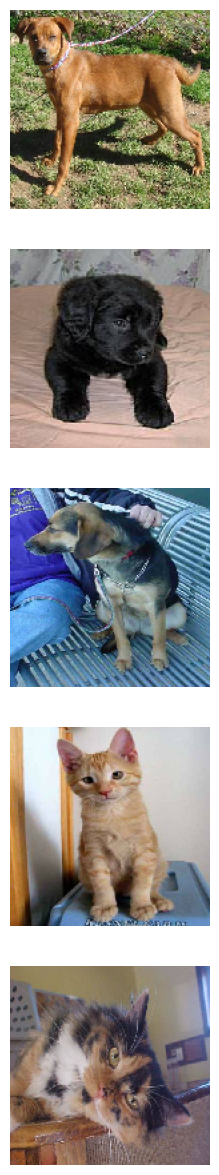

In [30]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [31]:
# 5
train_image_generator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Found 2000 images belonging to 2 classes.


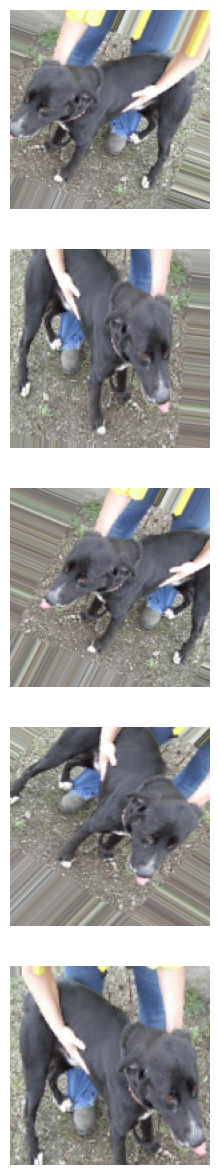

In [32]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [33]:
# 7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# 8 - Training the Model
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=30,  # Increase the number of epochs
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 647ms/step - accuracy: 0.5720 - loss: 0.6706 - val_accuracy: 0.4911 - val_loss: 0.6614
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5391 - loss: 0.6704 - val_accuracy: 0.5673 - val_loss: 0.6534
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 601ms/step - accuracy: 0.5524 - loss: 0.6552 - val_accuracy: 0.6217 - val_loss: 0.6367
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6484 - loss: 0.6386 - val_accuracy: 0.6538 - val_loss: 0.6533
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 552ms/step - accuracy: 0.6468 - loss: 0.6370 - val_accuracy: 0.6853 - val_loss: 0.5986
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6406 - loss: 0.6245 - val_accuracy: 0.6635 - val_loss: 0.5812
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 585ms/step - accuracy: 0.6460 - loss: 0.6358 - val_accuracy: 0.6674 - val_loss: 0.6068
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7266 - loss: 0.5670 - val_accuracy: 0.76

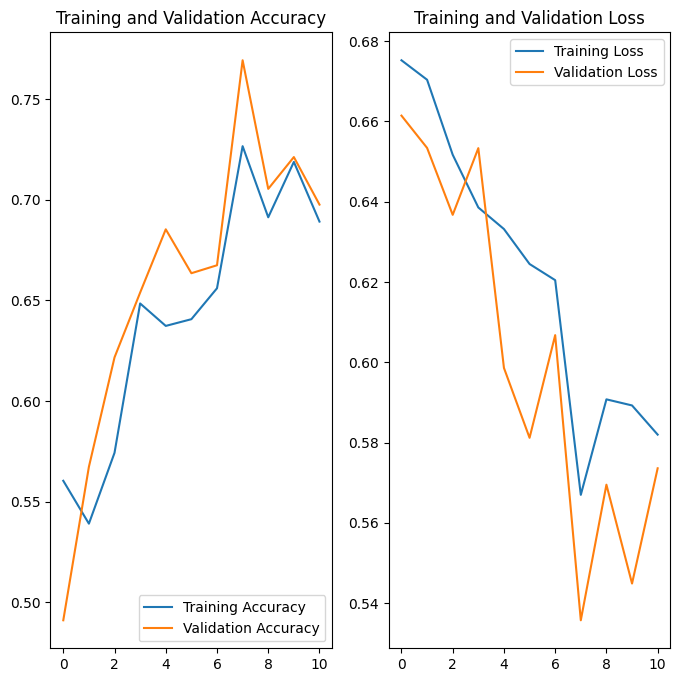

In [44]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


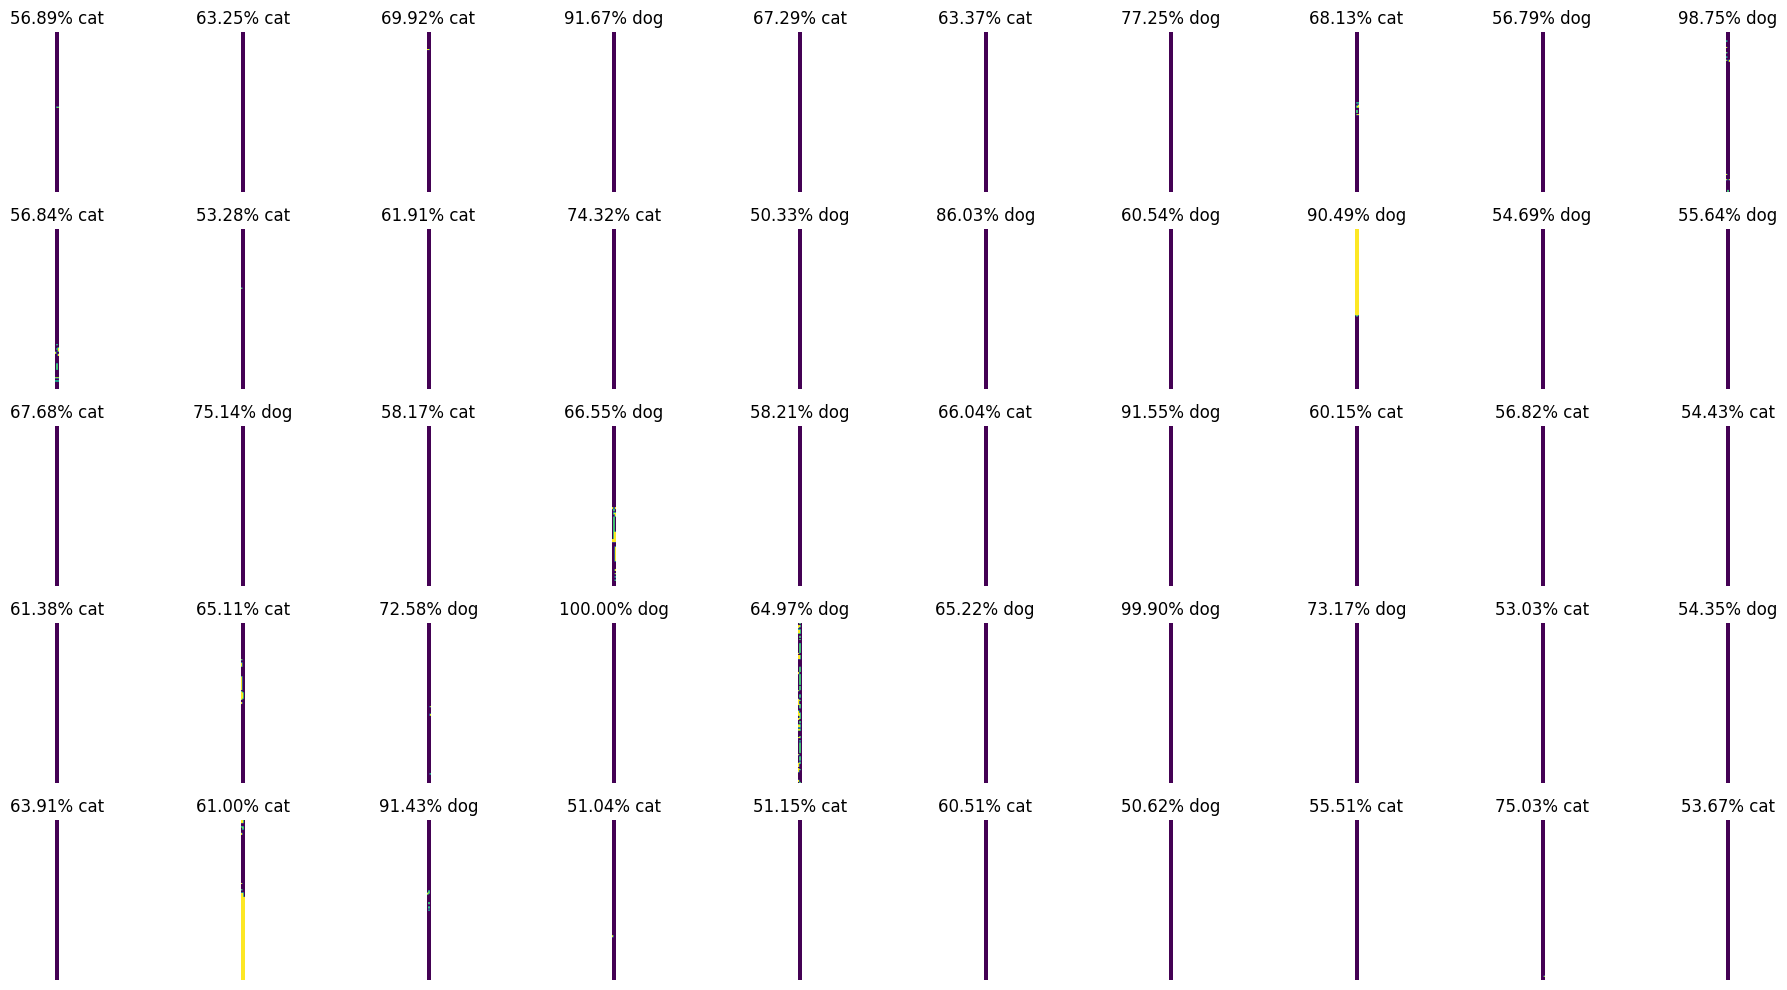

In [45]:
# 10 - Generate predictions for test data
test_data_gen.reset()  # Reset the generator to start from the beginning

# Generate predictions for all images using the generator
probabilities = model.predict(test_data_gen, steps=len(test_data_gen), verbose=1).flatten()  # Flatten to 1D array

# Collect all test images for plotting (use the generator again to get the images)
test_data_gen.reset()  # Reset again to get the images in the same order
images = [next(test_data_gen)[0][0].astype(np.uint8) for _ in range(len(test_data_gen))]

# Plotting the test images with their predicted probabilities
import matplotlib.pyplot as plt

def plotImages(images, probabilities):
    fig, axes = plt.subplots(5, 10, figsize=(20, 10))  # Adjust based on the number of images
    axes = axes.flatten()
    for img, ax, prob in zip(images, axes, probabilities):
        ax.imshow(img)
        ax.axis('off')
        # Display probability as a percentage with appropriate labeling
        if prob > 0.5:
            label = f"{prob * 100:.2f}% dog"
        else:
            label = f"{(1 - prob) * 100:.2f}% cat"
        ax.set_title(label)
    plt.tight_layout()
    plt.show()

# Plot the test images along with predicted probabilities
plotImages(images, probabilities)


In [46]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
